# The Method of Steepest Descent / Gradient descent

## 1.Simple explanation

Objective: To find the optimal solution of objective function: $ f(x)$

That is, get the minimum of this function

Gradient descent only uses information about the `first derivative` of the objective function -- as the name gradient suggests.

And it's supposed to take the `direction of the "fastest drop"` in the value of the target function as the **search direction**, which is where the name "fastest drop" comes from

The idea of gradient descent method is to select an appropriate initial value $x_0$, keep iteratively updating the value of $x$, minimize the objective function, and finally converge.

***Search direction*** and ***step size*** are the two most important things to updata $x$.

Let's look at an example of a function.

$ f(x_1,x_2) = (1-x_1)^{2} + 100(x_2 - x_1^{2})^{2} $ 

It's called the Rosenbrock function, also known as the banana function



Let's look at it in three dimensions.

Its global best lies in a long, narrow, parabolic, flat blue "valley."

It is not difficult to find the "valley", but to converge to the globally optimal solution (at (1,1)).

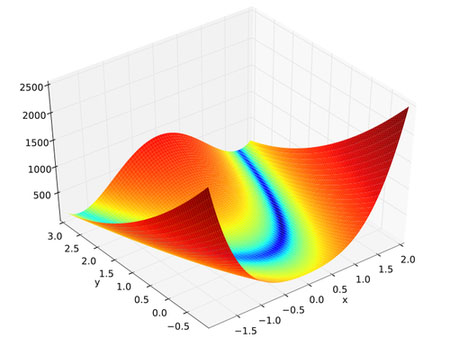

Let us focus on search direction first.

So what's the `fastest way` to decrease the function

## 2.Search direction

### The direction that  the value of the function decrease fast.

We use $d$ for direction and $g$ for gradient.

The objective function $f(x)$ is Taylor expanded at the point $x_k$

$f(x) = f(x_k) + a g_k d_k^T + o(a)$

$o(a)$ can be ignore, when $g_k d_k^T < 0$, $f(x) < f(x_k)$ , the function is decreasing

$dk$ is a downward direction at this time

When $dk$ is equal to exactly what, can the objective function value drop the fastest

we can use `Cauchy - Schwartz inequality`

$(a_1 b_1 + a_2 b_2 + \cdots + a_n b_n) \le \sqrt{(a_1^{2} + a_2^{2} + \cdots + a_n^{2} )} \sqrt{(b_1^{2} + b_2^{2} + \cdots + b_n^{2} )}$


It is equal if and only if $\frac{a_1}{b_1} = \frac{a_2}{b_2} = \cdots =  \frac{a_n}{b_n}$ 

So we can get $\left| d_k^T  g_k \right| \le \left\| d_k \right\|  \left\| g_k \right\| $

when $d_k = -g_k$,The minimum $d_k^T  g_k < 0 $ ， $f(x)$ drops the most

Therefore,$ - g_k$ is the fastest descending direction. Direction of negative gradient

We can set the convergence accuracy $\epsilon$， if $\left\| d_k \right\| < \epsilon $, we can stop.

## 3. stepsize

The step size is solved using `Armijo-Goldstein` criterion

Core ideas: 
① The value of the objective function should be reduced enough; 
② The step size α of one-dimensional search should not be too small.

Make α not too large or too small. 

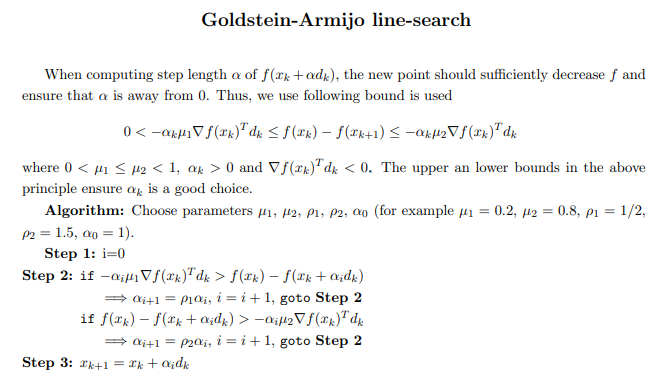

## 4.code

In [95]:
import numpy as np


def goldsteinsearch(fun,dfun,d,x,alph,rho1,rho2,mu1,mu2):     #calculate the stepsize with Armijo-Goldstein,The principle is shown in the figure above 
    flag =0
    
    fk = fun(x)
    gk = dfun(x) 
    
    fff1 = fk
    dfff = np.dot(gk,d)
    
    while(flag == 0):
        fff = fun(x + alph * d)                               # seem like thats the wrong place
        if(fff - fff1 <= mu2 * alph * dfff):                 # alphem must not too big or too small
            if(fff - fff1 > mu1 * alph * dfff):                
                flag = 1                                      # if alpha=em is suitable,flag==1,Jump out of the loop
            else:
                alph = alph * rho1                
        else:
            alph = alph * rho2            
    return alph


In [96]:
import numpy as np

def function1(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2


def dfunction1(x):
    return np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]),200*(x[1]-x[0]**2)])


<ipython-input-96-7746da0c17e6>:5: RuntimeWarning: overflow encountered in double_scalars
  return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
<ipython-input-95-78da95c05c79>:15: RuntimeWarning: overflow encountered in double_scalars
  if(fff - fff1 <= mu2 * alph * dfff):
<ipython-input-95-78da95c05c79>:14: RuntimeWarning: overflow encountered in multiply
  fff = fun(x - alph * d)


KeyboardInterrupt: 

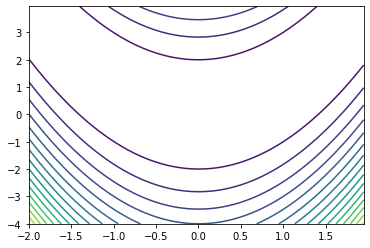

In [101]:
X1=np.arange(-2,2,0.05)
X2=np.arange(-4,4,0.05)
[x1,x2]=np.meshgrid(X1,X2)                              # Generate grid point coordinate matrix, easy to draw
f=100*(x2-x1**2)**2+(1-x1)**2;                         # Ready to draw a plot
plt.contour(x1,x2,f,20)                                 # Draw the 20 contours of the function




def mainstep(x0,pre):
    imax = 100
    M=np.zeros((2,imax))
    M[:,0] = x0
    x = x0
    for i in range(1,imax):
        gard = dfunction1(x)
        p = - gard                                 # fastest descending direction, negative Gradient
        p1 = np.linalg.norm(gard)
        if p1 < pre:                               # If the brane of the vector is smaller than the set value,
            break                                 # we approximately assume that the minimum value has been reached.
        alph = goldsteinsearch(function1,dfunction1,p,x,1,0.5,1.5,0.2,0.8)
        x = x + alph * p                          # New x 
        M[:,i] = x                                # put each x in matrix M
    
    return M

x0 = np.array([-1.5,1.5])
W=mainstep(x0,0.0001)

plt.plot(W[0,:],W[1,:],'g*',W[0,:],W[1,:])        # Add the trajectory of the algorithm to the graph
plt.show()


